In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import warnings
warnings.filterwarnings('ignore')

In [2]:
tex_fonts = {
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Palatino"],
    "axes.labelsize": 12,
    "font.size": 12,
    "legend.fontsize": 10,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11
}

plt.rcParams.update(tex_fonts)

In [3]:
def set_size(width_pt, fraction=1, subplots=(1, 1)):

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


In [4]:
wue_F=  pd.read_hdf("wue_F_merged.h5", "wue_F")
wue_F100 = wue_F[wue_F["Customers_N"] == 100]
wue_F100

,Customers_N,Distance,Time,Stops,Stops_h,FixedDC_Cost,Trans_Cost,Variable_DC,Fixed_V,Total_Cost,Var_per_order,Trans_per_order,Transp_order_with_V,FixedDC_per_order,Total_Cost_per_order,Items,Cost_per_item,City,Scenario
20,100,239403.0,44034.0,104.0,8.5,560,255.11,391.90,90.0,1297.01,3.92,2.55,3.45,5.6,12.97,4557.0,0.28,Wuerzburg,Fulfillment_Centre
21,100,214327.0,43512.0,103.0,8.5,560,248.09,376.59,67.5,1252.18,3.77,2.48,3.16,5.6,12.52,4379.0,0.29,Wuerzburg,Fulfillment_Centre
22,100,212442.0,43108.0,103.0,8.6,560,245.81,390.44,67.5,1263.75,3.90,2.46,3.13,5.6,12.64,4540.0,0.28,Wuerzburg,Fulfillment_Centre
23,100,203943.0,43469.0,103.0,8.5,560,246.01,407.38,67.5,1280.89,4.07,2.46,3.14,5.6,12.81,4737.0,0.27,Wuerzburg,Fulfillment_Centre
24,100,208490.0,43539.0,103.0,8.5,560,247.17,394.83,67.5,1269.50,3.95,2.47,3.15,5.6,12.70,4591.0,0.28,Wuerzburg,Fulfillment_Centre
25,100,205840.0,42688.0,103.0,8.7,560,242.59,405.06,67.5,1275.15,4.05,2.43,3.10,5.6,12.75,4710.0,0.27,Wuerzburg,Fulfillment_Centre
26,100,198211.0,43724.0,103.0,8.5,560,246.21,379.00,67.5,1252.71,3.79,2.46,3.14,5.6,12.53,4407.0,0.28,Wuerzburg,Fulfillment_Centre
27,100,229096.0,44204.0,104.0,8.5,560,254.08,370.75,90.0,1274.83,3.71,2.54,3.44,5.6,12.75,4311.0,0.30,Wuerzburg,Fulfillment_Centre
28,100,219447.0,43142.0,104.0,8.7,560,247.23,398.95,90.0,1296.18,3.99,2.47,3.37,5.6,12.96,4639.0,0.28,Wuerzburg,Fulfillment_Centre
29,100,223115.0,43732.0,104.0,8.6,560,250.73,386.14,90.0,1286.87,3.86,2.51,3.41,5.6,12.87,4490.0,0.29,Wuerzburg,Fulfillment_Centre


In [6]:
wue_F100.mean()

Customers_N                100.000
Distance                215431.400
Time                     43515.200
Stops                      103.400
Stops_h                      8.560
FixedDC_Cost               560.000
Trans_Cost                 248.303
Variable_DC                390.104
Fixed_V                     76.500
Total_Cost                1274.907
Var_per_order                3.901
Trans_per_order              2.483
Transp_order_with_V          3.249
FixedDC_per_order            5.600
Total_Cost_per_order        12.750
Items                     4536.100
Cost_per_item                0.282
dtype: float64

In [97]:
def pick_wue_F(var_factor):
    Customers = 100
    Items = 4536
    basket_size = (100/100) * 100
    COGS = 80
    Delivery_inc = (5/100)*100
    marketing = (2/100)*100
    cost_order_manipulation =  ((var_factor*Items)/Customers) + 3.249 + 5.6  
    cost_order = (cost_order_manipulation/100)*100
    prof_picking = (basket_size - COGS - marketing - cost_order + Delivery_inc)
    
    return(prof_picking)

In [186]:
pick_amount_F = [200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400] #420, 440, 460, 480, 500]

In [187]:
len(pick_amount_F)

11

In [188]:
var_factors_F = [0.11, 0.103, 0.098, 0.093, 0.089,
                 0.086, 0.083, 0.08, 0.077, 0.075,
                 0.073] #0.071, 0.07, 0.068,  0.067,0.066 ] 

In [ ]:
0.11, 0.103, 0.098, 0.093, 0.089, 0.086, 0.083, 0.08, 0.077, 0.075, 0.073, 0.071, 0.07, 0.068,  0.067,0.066 

In [189]:
len(var_factors_F)

11

In [190]:
pick_wue_F_list= [pick_wue_F(var_factor) for var_factor in var_factors_F]
#pick_wue_F_list.reverse()
pick_wue_F_list

[9.161399999999999,
 9.47892,
 9.70572,
 9.932519999999998,
 10.113960000000002,
 10.25004,
 10.38612,
 10.5222,
 10.658280000000001,
 10.749,
 10.83972]

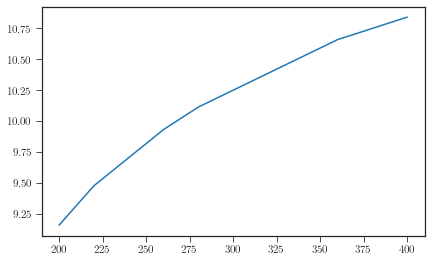

In [191]:
plt.style.use("seaborn-ticks")

fig, ax1 = plt.subplots(1,1, figsize=set_size(445))

ax1.plot(pick_amount_F, pick_wue_F_list)
#ax1.plot(F_picking_amount, basket_profs_D)
#ax1.plot(F_picking_amount, basket_profs_F)
fig.tight_layout()
plt.show()

In [116]:
pick_amount_IS = list(range(40,160,10))

In [117]:
pick_amount_IS

[40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]

In [118]:
var_factors_IS = [0.409, 0.335, 0.286, 0.25, 0.224, 0.203, 0.187, 0.173, 0.162, 0.152, 0.144, 0.137]

In [41]:
wue_IS_100 = pd.read_hdf("results/Wue_IS100/wue_IS_100_merged.h5", "wue_IS_100")
wue_IS_100.mean()

Customers_N                100.000
Distance                154559.200
Time                     40737.800
Stops                      103.000
Stops_h                      9.100
FixedDC_Cost               480.000
Trans_Cost                 223.973
Variable_DC               1208.517
Fixed_V                     67.500
Total_Cost                1979.990
Var_per_order               12.085
Trans_per_order              2.240
Transp_order_with_V          2.915
FixedDC_per_order            4.800
Total_Cost_per_order        19.799
Items                     4543.300
Cost_per_item                0.437
dtype: float64

In [119]:
def pick_wue_IS(var_factor):
    Customers = 100
    Items = 4543
    basket_size = (100/100) * 100
    COGS = 80
    Delivery_inc = (5/100)*100
    marketing = (2/100)*100
    cost_order_manipulation =  ((var_factor*Items)/Customers) + 2.915 +4.8  
    cost_order = (cost_order_manipulation/100)*100
    prof_picking = (basket_size - COGS - marketing - cost_order + Delivery_inc)
    
    return(prof_picking)

In [120]:
wue_IS_pick= [pick_wue_IS(var_factor) for var_factor in var_factors_IS]
wue_IS_pick

[-3.2958700000000007,
 0.06594999999999729,
 2.292020000000001,
 3.9274999999999984,
 5.10868,
 6.062709999999999,
 6.7895900000000005,
 7.425609999999999,
 7.9253399999999985,
 8.379640000000002,
 8.743079999999999,
 9.061090000000002]

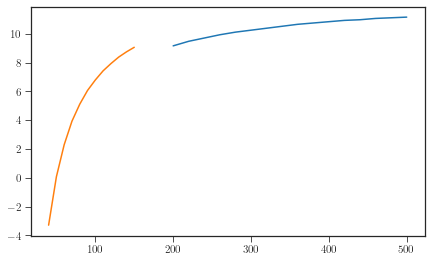

In [121]:
plt.style.use("seaborn-ticks")

fig, ax1 = plt.subplots(1,1, figsize=set_size(445))

ax1.plot(pick_amount_F, pick_wue_F_list)
ax1.plot(pick_amount_IS, wue_IS_pick)
#ax1.plot(F_picking_amount, basket_profs_F)
fig.tight_layout()
plt.show()

In [47]:
wue_D_100 =  pd.read_hdf("results/Wue_D100/wue_D_100_merged.h5", "wue_D_100")
wue_D_avg = wue_D_100.mean()
wue_D_avg

Customers_N                100.000
Distance                213952.400
Time                     44029.600
Stops                      103.300
Stops_h                      8.460
FixedDC_Cost               480.000
Trans_Cost                 250.512
Variable_DC                662.270
Fixed_V                     74.250
Total_Cost                1467.032
Var_per_order                6.622
Trans_per_order              2.506
Transp_order_with_V          3.248
FixedDC_per_order            4.800
Total_Cost_per_order        14.670
Items                     4536.100
Cost_per_item                0.325
dtype: float64

In [176]:
D_pick_amount = list(range(100, 220, 15))
len(D_pick_amount)

8

In [177]:
D_pick_amount

[100, 115, 130, 145, 160, 175, 190, 205]

In [178]:
var_factors_D = [0.176, 0.156, 0.141, 0.13, 0.12, 0.112, 0.105, 0.099]

In [179]:
def pick_wue_D(var_factor):
    Customers = 100
    Items = 4543
    basket_size = (100/100) * 100
    COGS = 80
    Delivery_inc = (5/100)*100
    marketing = (2/100)*100
    cost_order_manipulation =  ((var_factor*Items)/Customers) + 3.248 +4.8  
    cost_order = (cost_order_manipulation/100)*100
    prof_picking = (basket_size - COGS - marketing - cost_order + Delivery_inc)
    
    return(prof_picking)

In [180]:
wue_D_pick= [pick_wue_D(var_factor) for var_factor in var_factors_D]
wue_D_pick

[6.956319999999998,
 7.8649200000000015,
 8.54637,
 9.046100000000001,
 9.500399999999999,
 9.86384,
 10.181849999999999,
 10.45443]

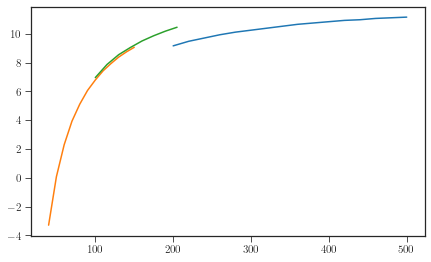

In [181]:
plt.style.use("seaborn-ticks")

fig, ax1 = plt.subplots(1,1, figsize=set_size(445))

ax1.plot(pick_amount_F, pick_wue_F_list)
ax1.plot(pick_amount_IS, wue_IS_pick)
ax1.plot(D_pick_amount, wue_D_pick)
fig.tight_layout()
plt.show()

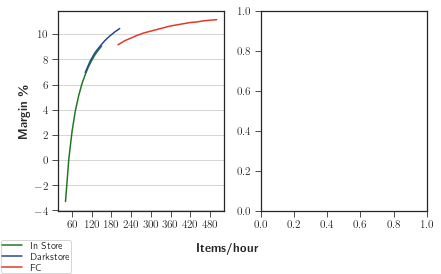

In [182]:
plt.style.use("seaborn-ticks")

fig, (ax1,ax2) = plt.subplots(1,2, figsize=set_size(445))

ax1.plot(pick_amount_IS, wue_IS_pick, label="In Store", color="#207720")
ax1.plot(D_pick_amount, wue_D_pick, label = "Darkstore", color="#234990")
ax1.plot(pick_amount_F, pick_wue_F_list, label= "FC", color = "#E23726")

loc =plticker.MultipleLocator(base=60)
ax1.xaxis.set_major_locator(loc)

ax1.set_ylabel("\\textbf{Margin \%}")
fig.supxlabel("\\textbf{Items/hour}", y = 0.05, fontsize=12)
ax1.yaxis.grid(True)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower left', frameon=True,
           fancybox=True, ncol=1, borderpad=0.1, labelspacing = 0.2, borderaxespad=0.1)

fig.tight_layout()
plt.show()

In [136]:
alb_F=  pd.read_hdf("alb_F_merged.h5", "alb_F")
alb_F100 = alb_F[alb_F["Customers_N"] == 100]
alb_F100

,Customers_N,Distance,Time,Stops,Stops_h,FixedDC_Cost,Trans_Cost,Variable_DC,Fixed_V,Total_Cost,Var_per_order,Trans_per_order,Transp_order_with_V,FixedDC_per_order,Total_Cost_per_order,Items,Cost_per_item,City,Scenario
20,100,143108.00,37456.00,103.000000,9.9,560,206.11,391.90,67.500000,1225.51,3.92,2.06,2.74,5.6,12.26,4557.0,0.27,Albstadt,Fulfillment_Centre
21,100,155763.87,38270.97,102.999928,9.7,560,212.31,376.59,67.499939,1216.40,3.77,2.12,2.80,5.6,12.16,4379.0,0.28,Albstadt,Fulfillment_Centre
22,100,159333.00,38827.00,104.000000,9.6,560,215.63,390.44,90.000000,1256.07,3.90,2.16,3.06,5.6,12.56,4540.0,0.28,Albstadt,Fulfillment_Centre
23,100,175066.00,40188.00,104.000000,9.3,560,225.02,407.38,90.000000,1282.40,4.07,2.25,3.15,5.6,12.82,4737.0,0.27,Albstadt,Fulfillment_Centre
24,100,143774.00,36896.00,103.000000,10.0,560,203.53,394.83,67.500000,1225.86,3.95,2.04,2.71,5.6,12.26,4591.0,0.27,Albstadt,Fulfillment_Centre
25,100,170925.00,39032.00,104.000000,9.6,560,218.71,405.06,90.000000,1273.77,4.05,2.19,3.09,5.6,12.74,4710.0,0.27,Albstadt,Fulfillment_Centre
26,100,176251.00,40054.00,104.000000,9.3,560,224.59,379.00,90.000000,1253.59,3.79,2.25,3.15,5.6,12.54,4407.0,0.28,Albstadt,Fulfillment_Centre
27,100,195801.00,40952.00,104.000000,9.1,560,232.42,370.75,90.000000,1253.17,3.71,2.32,3.22,5.6,12.53,4311.0,0.29,Albstadt,Fulfillment_Centre
28,100,160514.00,39207.00,104.000000,9.5,560,217.67,398.95,90.000000,1266.62,3.99,2.18,3.08,5.6,12.67,4639.0,0.27,Albstadt,Fulfillment_Centre
29,100,171211.99,39180.00,102.999999,9.5,560,219.47,386.14,67.499979,1233.11,3.86,2.19,2.87,5.6,12.33,4490.0,0.27,Albstadt,Fulfillment_Centre


In [137]:
alb_F100.mean()

Customers_N                100.000000
Distance                165174.786000
Time                     39006.297000
Stops                      103.599993
Stops_h                      9.550000
FixedDC_Cost               560.000000
Trans_Cost                 217.546000
Variable_DC                390.104000
Fixed_V                     80.999992
Total_Cost                1248.650000
Var_per_order                3.901000
Trans_per_order              2.176000
Transp_order_with_V          2.987000
FixedDC_per_order            5.600000
Total_Cost_per_order        12.487000
Items                     4536.100000
Cost_per_item                0.275000
dtype: float64

In [192]:
def pick_alb_F(var_factor):
    Customers = 100
    Items = 4536
    basket_size = (100/100) * 100
    COGS = 80
    Delivery_inc = (5/100)*100
    marketing = (2/100)*100
    cost_order_manipulation =  ((var_factor*Items)/Customers) + 2.987 + 5.6  
    cost_order = (cost_order_manipulation/100)*100
    prof_picking = (basket_size - COGS - marketing - cost_order + Delivery_inc)
    
    return(prof_picking)

In [193]:
alb_F_pick = [pick_alb_F(var_factor) for var_factor in var_factors_F]

alb_F_pick 

[9.4234,
 9.740920000000003,
 9.967720000000002,
 10.19452,
 10.37596,
 10.51204,
 10.64812,
 10.7842,
 10.92028,
 11.011000000000001,
 11.10172]

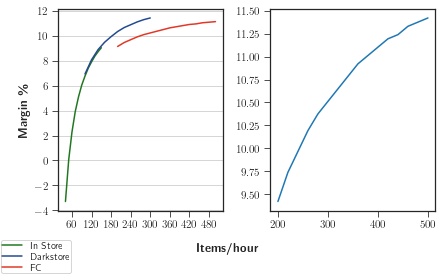

In [140]:
plt.style.use("seaborn-ticks")

fig, (ax1,ax2) = plt.subplots(1,2, figsize=set_size(445))

ax1.plot(pick_amount_IS, wue_IS_pick, label="In Store", color="#207720")
ax1.plot(D_pick_amount, wue_D_pick, label = "Darkstore", color="#234990")
ax1.plot(pick_amount_F, pick_wue_F_list, label= "FC", color = "#E23726")

ax2.plot(pick_amount_F, alb_F_pick)

loc =plticker.MultipleLocator(base=60)
ax1.xaxis.set_major_locator(loc)

ax1.set_ylabel("\\textbf{Margin \%}")
fig.supxlabel("\\textbf{Items/hour}", y = 0.05, fontsize=12)
ax1.yaxis.grid(True)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower left', frameon=True,
           fancybox=True, ncol=1, borderpad=0.1, labelspacing = 0.2, borderaxespad=0.1)

fig.tight_layout()
plt.show()

In [141]:
alb_IS_100 = pd.read_hdf("results/Alb_IS100/alb_IS_100_merged.h5", "alb_IS_100")
alb_D_100 =  pd.read_hdf("results/Alb_D100/alb_D_100_merged.h5", "alb_D_100")

In [142]:
alb_IS_100.mean()

Customers_N                100.000
Distance                131673.400
Time                     36791.500
Stops                      103.000
Stops_h                     10.080
FixedDC_Cost               480.000
Trans_Cost                 200.853
Variable_DC               1205.113
Fixed_V                     67.500
Total_Cost                1953.466
Var_per_order               12.051
Trans_per_order              2.011
Transp_order_with_V          2.683
FixedDC_per_order            4.800
Total_Cost_per_order        19.533
Items                     4530.500
Cost_per_item                0.431
dtype: float64

In [143]:
def pick_alb_IS(var_factor):
    Customers = 100
    Items = 4530
    basket_size = (100/100) * 100
    COGS = 80
    Delivery_inc = (5/100)*100
    marketing = (2/100)*100
    cost_order_manipulation =  ((var_factor*Items)/Customers) + 2.683 +4.8  
    cost_order = (cost_order_manipulation/100)*100
    prof_picking = (basket_size - COGS - marketing - cost_order + Delivery_inc)
    
    return(prof_picking)

In [144]:
alb_IS_pick = [pick_alb_IS(var_factor) for var_factor in var_factors_IS]

alb_IS_pick 

[-3.0106999999999964,
 0.3414999999999999,
 2.5611999999999995,
 4.192,
 5.3698000000000015,
 6.321100000000001,
 7.045899999999998,
 7.6800999999999995,
 8.178399999999998,
 8.6314,
 8.9938,
 9.310900000000002]

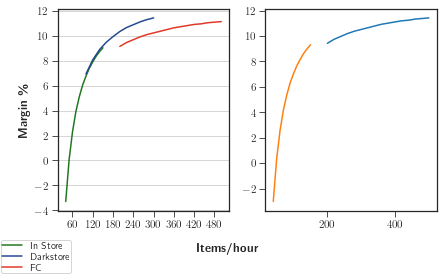

In [145]:
plt.style.use("seaborn-ticks")

fig, (ax1,ax2) = plt.subplots(1,2, figsize=set_size(445))

ax1.plot(pick_amount_IS, wue_IS_pick, label="In Store", color="#207720")
ax1.plot(D_pick_amount, wue_D_pick, label = "Darkstore", color="#234990")
ax1.plot(pick_amount_F, pick_wue_F_list, label= "FC", color = "#E23726")

ax2.plot(pick_amount_F, alb_F_pick)
ax2.plot(pick_amount_IS, alb_IS_pick)

loc =plticker.MultipleLocator(base=60)
ax1.xaxis.set_major_locator(loc)

ax1.set_ylabel("\\textbf{Margin \%}")
fig.supxlabel("\\textbf{Items/hour}", y = 0.05, fontsize=12)
ax1.yaxis.grid(True)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower left', frameon=True,
           fancybox=True, ncol=1, borderpad=0.1, labelspacing = 0.2, borderaxespad=0.1)

fig.tight_layout()
plt.show()

In [146]:
alb_D_100.mean()

Customers_N                100.000000
Distance                150439.582000
Time                     37959.296000
Stops                      102.999989
Stops_h                      9.780000
FixedDC_Cost               480.000000
Trans_Cost                 209.853000
Variable_DC                662.270000
Fixed_V                     67.499991
Total_Cost                1419.623000
Var_per_order                6.622000
Trans_per_order              2.099000
Transp_order_with_V          2.773000
FixedDC_per_order            4.800000
Total_Cost_per_order        14.196000
Items                     4536.100000
Cost_per_item                0.314000
dtype: float64

In [183]:
def pick_alb_D(var_factor):
    Customers = 100
    Items = 4536
    basket_size = (100/100) * 100
    COGS = 80
    Delivery_inc = (5/100)*100
    marketing = (2/100)*100
    cost_order_manipulation =  ((var_factor*Items)/Customers) + 2.773 +4.8  
    cost_order = (cost_order_manipulation/100)*100
    prof_picking = (basket_size - COGS - marketing - cost_order + Delivery_inc)
    
    return(prof_picking)

In [184]:
alb_D_pick = [pick_alb_D(var_factor) for var_factor in var_factors_D]

alb_D_pick 

[7.443640000000004,
 8.350840000000003,
 9.03124,
 9.5302,
 9.983800000000002,
 10.34668,
 10.664200000000001,
 10.93636]

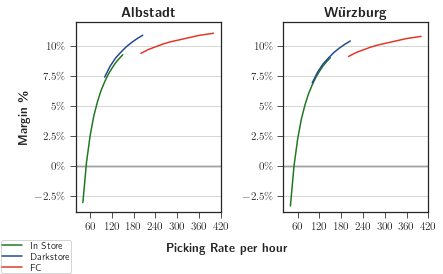

In [200]:
plt.style.use("seaborn-ticks")

fig, (ax1,ax2) = plt.subplots(1,2, figsize=set_size(445))

ax1.set_title("\\textbf{Albstadt}", fontsize=14)
ax2.set_title("\\textbf{Würzburg}", fontsize=14)
ax1.set_ylabel("\\textbf{Margin \%}")
fig.supxlabel("\\textbf{Picking Rate per hour}", y = 0.05, fontsize=12)


ax1.plot(pick_amount_IS, alb_IS_pick, label="In Store", color="#207720")
ax1.plot(D_pick_amount, alb_D_pick, label = "Darkstore", color="#234990")
ax1.plot(pick_amount_F, alb_F_pick, label= "FC", color = "#E23726")

ax2.plot(pick_amount_IS, wue_IS_pick, label="In Store", color="#207720")
ax2.plot(D_pick_amount, wue_D_pick, label = "Darkstore", color="#234990")
ax2.plot(pick_amount_F, pick_wue_F_list, label= "FC", color = "#E23726")



ax1.set_ylim(ymax = 12, ymin =-3.8)
ax2.set_ylim(ymax=12, ymin=-3.8)

ax1.set_xlim(xmax = 420, xmin =20)
ax2.set_xlim(xmax=420, xmin=20)

ax1.axhline(y=0,xmin=0,xmax=420,c="black",linewidth=1.3,zorder=0)
ax2.axhline(y=0,xmin=0,xmax=420,c="black",linewidth=1.3,zorder=0)

loc =plticker.MultipleLocator(base=60)
ax1.xaxis.set_major_locator(loc)

ax2.xaxis.set_major_locator(loc)


ax1.set_yticks([-2.5, 0, 2.5, 5, 7.5, 10],["$-2.5\%$", "$0\%$", 
                    "$2.5\%$", "$5\%$", "$7.5\%$","$10\%$" ], rotation=0)
ax2.set_yticks([-2.5, 0, 2.5, 5, 7.5, 10],["$-2.5\%$", "$0\%$", 
                    "$2.5\%$", "$5\%$", "$7.5\%$","$10\%$" ], rotation=0)

ax1.yaxis.grid(True)
ax2.yaxis.grid(True)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower left', frameon=True,
           fancybox=True, ncol=1, borderpad=0.1, labelspacing = 0.2, borderaxespad=0.1)

fig.tight_layout()
plt.show()
fig.savefig("result_graph/pick_rates.svg", format="svg")